In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dengue=pd.read_csv('denue_inegi_31_.csv', encoding="ISO-8859-1", engine='python')
dengue.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8147852,31098112512000011000000000U3,8 VENADO RANCHO AGROECOLÓGICO,8 VENADO RANCHO AGROECOLOGICO,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,OTRO (ESPECIFIQUE),FEDERAL 184 TZUCACAB-PETO,OTRO (ESPECIFIQUE),...,Tzucacab,0247,14,9981330870,NaN,NaN,Fijo,20.073548,-89.035861,2019-11
1,8993106,31011114119002085000000000U0,ABADEJOS,ABADEJOS SC DE RL DE CV,114119,"Pesca y captura de peces, crustáceos, moluscos...",11 a 30 personas,CALLE,10,CALLE,...,Celestún,0067,4,NaN,NaN,NaN,Fijo,20.862077,-90.398877,2019-11
2,8836182,31041112512000012000000000U1,ACUACULTORES DE MULCHECHEN SC DE RL,ACUACULTORES DE MULCHECHEN SC DE RL,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,66,CALLE,...,Kanasín,0403,4,9994185561,NaN,NaN,Fijo,20.913551,-89.577203,2019-11
3,8241964,31004112512000013000000000U7,ACUACULTURA INTEGRAL SAN MIGUEL S DE RL DE CV,ACUACULTURA INTEGRAL SAN MIGUEL S DE RL DE CV,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CALLE,Sin Referencia,CALLE,...,Baca,0043,15,NaN,AISANMIGUEL@HOTMAIL.COM,NaN,Fijo,21.099167,-89.396995,2019-11
4,9296005,31089112512000031000000000U0,ACUARIO EL REY GUPPY,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,31,CALLE,...,Ticul,0182,11,9971259213,NaN,NaN,Fijo,20.393505,-89.522012,2020-11


In [15]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130390 entries, 0 to 130389
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          130390 non-null  int64  
 1   clee        130390 non-null  object 
 2   nom_estab   130390 non-null  object 
 3   raz_social  26460 non-null   object 
 4   codigo_act  130390 non-null  int64  
 5   nombre_act  130390 non-null  object 
 6   per_ocu     130390 non-null  object 
 7   tipo_vial   130118 non-null  object 
 8   nom_vial    130375 non-null  object 
 9   tipo_v_e_1  128837 non-null  object 
 10  nom_v_e_1   129203 non-null  object 
 11  tipo_v_e_2  128836 non-null  object 
 12  nom_v_e_2   129197 non-null  object 
 13  tipo_v_e_3  128850 non-null  object 
 14  nom_v_e_3   129190 non-null  object 
 15  numero_ext  75056 non-null   float64
 16  letra_ext   92497 non-null   object 
 17  edificio    8192 non-null    object 
 18  edificio_e  8489 non-null    object 
 19  nu

In [16]:
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [20]:
info_dengue=infoOut(dengue)
info_dengue

,Column,Non-Null Count,Dtype
0,id,130390,int64
1,clee,130390,object
2,nom_estab,130390,object
3,raz_social,26460,object
4,codigo_act,130390,int64
5,nombre_act,130390,object
6,per_ocu,130390,object
7,tipo_vial,130118,object
8,nom_vial,130375,object
9,tipo_v_e_1,128837,object


In [21]:
info_dengue.Dtype.value_counts()

object     31
int64       6
float64     5
Name: Dtype, dtype: int64

In [29]:
info_dengue['Dtype']=='int64'

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29     True
30    False
31     True
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
Name: Dtype, dtype: bool

In [30]:
info_dengue[info_dengue['Dtype']=='int64']

,Column,Non-Null Count,Dtype
0,id,130390,int64
4,codigo_act,130390,int64
27,cve_ent,130390,int64
29,cve_mun,130390,int64
31,cve_loc,130390,int64
34,manzana,130390,int64


In [31]:
info_dengue[info_dengue['Dtype']=='float64']

,Column,Non-Null Count,Dtype
15,numero_ext,75056,float64
19,numero_int,42771,float64
26,cod_postal,128695,float64
39,latitud,130390,float64
40,longitud,130390,float64


In [32]:
info_dengue[info_dengue['Dtype']=='object']

,Column,Non-Null Count,Dtype
1,clee,130390,object
2,nom_estab,130390,object
3,raz_social,26460,object
5,nombre_act,130390,object
6,per_ocu,130390,object
7,tipo_vial,130118,object
8,nom_vial,130375,object
9,tipo_v_e_1,128837,object
10,nom_v_e_1,129203,object
11,tipo_v_e_2,128836,object


In [38]:
dengue.describe()

,id,codigo_act,numero_ext,numero_int,cod_postal,cve_ent,cve_mun,cve_loc,manzana,latitud,longitud
count,1.303900e+05,130390.000000,75056.000000,42771.000000,128695.000000,130390.0,130390.000000,130390.000000,130390.000000,130390.000000,130390.000000
mean,6.110354e+06,530838.764721,343.168075,39.016483,97456.001601,31.0,56.323683,4.721673,20.344919,20.844852,-89.327945
std,1.749251e+06,179255.628612,1602.789413,738.387675,481.114337,0.0,23.526949,65.504094,48.141620,0.288398,0.522545
min,1.538733e+06,112511.000000,0.000000,0.000000,0.000000,31.0,1.000000,1.000000,1.000000,19.958594,-90.404962
25%,4.537076e+06,434314.000000,0.000000,0.000000,97203.000000,31.0,50.000000,1.000000,8.000000,20.693792,-89.636848
50%,4.589571e+06,465311.000000,194.000000,0.000000,97370.000000,31.0,50.000000,1.000000,16.000000,20.958280,-89.580109
75%,7.697420e+06,722513.000000,407.000000,0.000000,97770.000000,31.0,70.000000,1.000000,25.000000,21.004384,-89.201883
max,9.392267e+06,932110.000000,80314.000000,97000.000000,99999.000000,31.0,106.000000,9001.000000,800.000000,21.609453,-87.557804


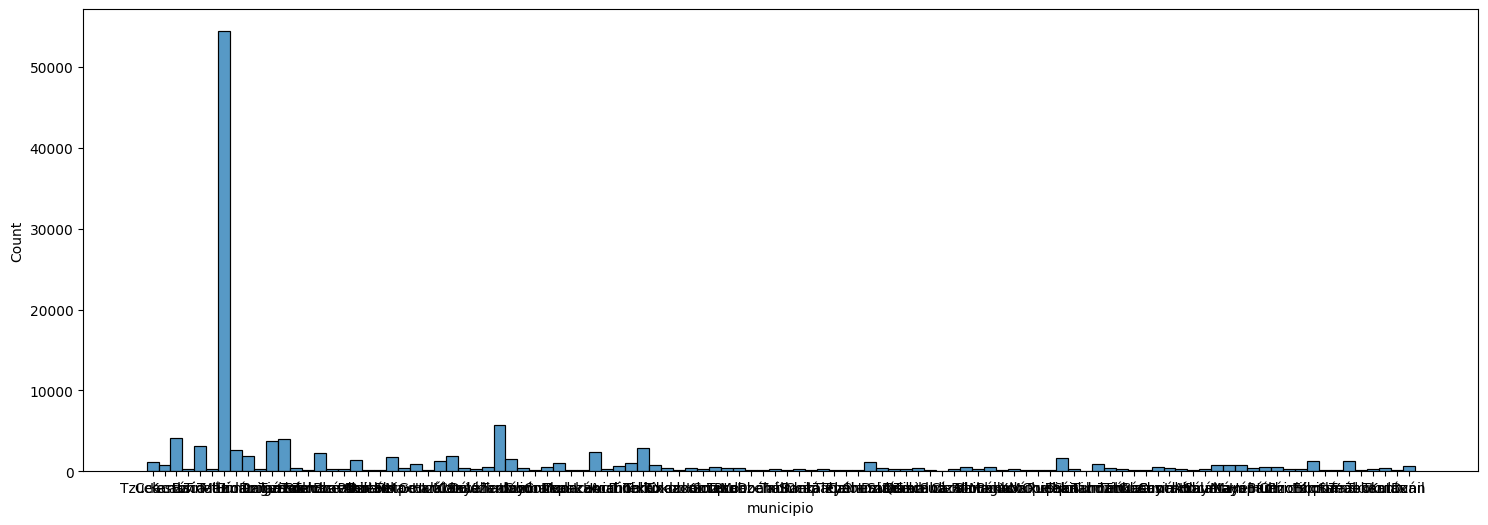

In [37]:
plt.figure(figsize=(18,6));
sns.histplot(data=dengue, x='municipio');